# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import the neccessary libraries
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import configparser
import re
import time
from nltk import pos_tag

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
# Quick check to the file content and structure
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# assign the url to a variable called url 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Use requests to fetch the content
response = requests.get(url)

In [4]:
# Create a file named image-predictions.tsv
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [5]:
# load the image predictions df
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
# Quick check to the file content and structure
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Read in the file containing the user access keys
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [7]:
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,
                wait_on_rate_limit = True, 
                wait_on_rate_limit_notify = True)

In [9]:
# Save each tweet returned JSON as a new line in a .txt file
tweet_id_list = twitter_archive.tweet_id.values
with open('tweet.json.txt', 'w') as file:
    for tweet_id in tweet_id_list:
        try:
            status = api.get_status(tweet_id)
            json.dump(status._json, file)
            file.write('\n')
        except Exception as e:
            pass

Rate limit reached. Sleeping for: 723
Rate limit reached. Sleeping for: 723


In [10]:
# Create the tweet df from the text file created
tweets = []
with open('tweet.json.txt') as file:
    for line in file:
        l = json.loads(line)
        tweets.append({'tweet_id': l['id'],
                      'retweet_count': l['retweet_count'],
                      'favorite_count': l['favorite_count']})

In [11]:
# Load tweet df
tweets = pd.DataFrame(tweets)
tweets.head()

favorite_count  retweet_count            tweet_id
0           33662           6961  892420643555336193
1           29195           5266  892177421306343426
2           21950           3463  891815181378084864
3           36749           7183  891689557279858688
4           35139           7706  891327558926688256

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
# display the twitter archive table
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [13]:
# twitter_archive_df[twitter_archive_df['doggo'] == 'None'].sample(50)

In [14]:
# display the first 5 rows of twitter archive 
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [15]:
# display the ladt 5 rows of twitter archive
twitter_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [16]:
# randomly display any five rows of twitter archive
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1835  676101918813499392                    NaN                  NaN   
1376  701805642395348998                    NaN                  NaN   
1217  714962719905021952                    NaN                  NaN   
905   758099635764359168                    NaN                  NaN   
1451  695794761660297217                    NaN                  NaN   

                      timestamp  \
1835  2015-12-13 18:10:33 +0000   
1376  2016-02-22 16:27:58 +0000   
1217  2016-03-29 23:49:30 +0000   
905   2016-07-27 00:40:12 +0000   
1451  2016-02-06 02:22:53 +0000   

                                                 source  \
1835  <a href="http://twitter.com/download/iphone" r...   
1376  <a href="http://vine.co" rel="nofollow">Vine -...   
1217  <a href="http://vine.co" rel="nofollow">Vine -...   
905   <a href="http://vine.co" rel="nofollow">Vine -...   
1451  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1835  Meet Striker. He's ready for Christmas. 11/10 ...                  NaN   
1376  Please pray for this pupper. Nothing wrong wit...                  NaN   
1217  Just in case anyone's having a bad day. 12/10 ...                  NaN   
905   In case you haven't seen the most dramatic sne...                  NaN   
1451  This is Wyatt. His throne is modeled after him...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1835                       NaN                        NaN   
1376                       NaN                        NaN   
1217                       NaN                        NaN   
905                        NaN                        NaN   
1451                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1835  https://twitter.com/dog_rates/status/676101918...                11   
1376                      https://vine.co/v/ivV6Y37mH5Z                11   
1217                      https://vine.co/v/inVtemLt9tE                12   
905                       https://vine.co/v/hQJbaj1VpIz                13   
1451  https://twitter.com/dog_rates/status/695794761...                13   

      rating_denominator     name doggo floofer  pupper puppo  
1835                  10  Striker  None    None    None  None  
1376                  10     None  None    None  pupper  None  
1217                  10     None  None    None    None  None  
905                   10     None  None    None    None  None  
1451                  10    Wyatt  None    None    None  None

In [17]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
# check the details of twittwer archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
# check the dublicated values of twitter archive
twitter_archive.duplicated().sum()

0

In [23]:
# checking for the value counts of the name column of twitter archive
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Bailey         7
Toby           7
Buddy          7
Daisy          7
Jax            6
Oscar          6
Dave           6
Stanley        6
Rusty          6
Milo           6
Koda           6
Leo            6
Bella          6
Jack           6
Scout          6
Chester        5
            ... 
Marvin         1
Chef           1
Cuddles        1
Brady          1
Rose           1
Hall           1
Mary           1
Jazz           1
Rueben         1
Clifford       1
all            1
Cermet         1
Luther         1
Skye           1
Alfy           1
Meatball       1
Sandra         1
Mark           1
Tycho          1
Ralphie        1
Samsom         1
Craig          1
Josep          1
Bobbay         1
Nimbus         1
Jeremy         1
Grizzwald      1
Jangle        

In [24]:
# check the name value with none in the twitter archive table
twitter_archive[twitter_archive['name'] == 'None']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
32    886054160059072513                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
55    881633300179243008           8.816070e+17         4.738443e+07   
59    880872448815771648                    NaN                  NaN   
62    880095782870896641                    NaN                  NaN   
64    879674319642796034           8.795538e+17         3.105441e+09   
72    878604707211726852                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
83    876537666061221889                    NaN                  NaN   
88    875097192612077568                    NaN                  NaN   
89    875021211251597312                    NaN                  NaN   
93    874057562936811520                    NaN                  NaN   
96    873580283840344065                    NaN                  NaN   
99    872967104147763200                    NaN                  NaN   
100   872820683541237760                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
103   872486979161796608                    NaN                  NaN   
110   871102520638267392                    NaN                  NaN   
112   870804317367881728                    NaN                  NaN   
113   870726314365509632           8.707262e+17         1.648776e+07   
...                  ...                    ...                  ...   
2294  667138269671505920                    NaN                  NaN   
2298  667070482143944705           6.670655e+17         4.196984e+09   
2299  667065535570550784                    NaN                  NaN   
2301  667044094246576128                    NaN                  NaN   
2305  666837028449972224                    NaN                  NaN   
2306  666835007768551424                    NaN                  NaN   
2307  666826780179869698                    NaN                  NaN   
2310  666786068205871104                    NaN                  NaN   
2316  666649482315059201                    NaN                  NaN   
2320  666437273139982337                    NaN                  NaN   
2321  666435652385423360                    NaN                  NaN   
2322  666430724426358785                    NaN                  NaN   
2323  666428276349472768                    NaN                  NaN   
2324  666421158376562688                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN         

In [25]:
# check the value with a in the twitter archive table
twitter_archive.loc[twitter_archive['name'] == 'a']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
56    881536004380872706                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
1002  747885874273214464                    NaN                  NaN   
1004  747816857231626240                    NaN                  NaN   
1017  746872823977771008                    NaN                  NaN   
1049  743222593470234624                    NaN                  NaN   
1193  717537687239008257                    NaN                  NaN   
1207  715733265223708672                    NaN                  NaN   
1340  704859558691414016                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1361  703079050210877440                    NaN                  NaN   
1368  702539513671897089                    NaN                  NaN   
1382  700864154249383937                    NaN                  NaN   
1499  692187005137076224                    NaN                  NaN   
1737  679530280114372609                    NaN                  NaN   
1785  677644091929329666                    NaN                  NaN   
1853  675706639471788032                    NaN                  NaN   
1854  675534494439489536                    NaN                  NaN   
1877  675109292475830276                    NaN                  NaN   
1878  675047298674663426                    NaN                  NaN   
1923  674082852460433408                    NaN                  NaN   
1941  673715861853720576                    NaN                  NaN   
1955  673636718965334016                    NaN                  NaN   
1994  672604026190569472                    NaN                  NaN   
2034  671743150407421952                    NaN                  NaN   
2066  671147085991960577                    NaN                  NaN   
2116  670427002554466305                    NaN                  NaN   
2125  670361874861563904                    NaN                  NaN   
2128  670303360680108032                    NaN                  NaN   
2146  669923323644657664                    NaN                  NaN   
2153  669661792646373376                    NaN                  NaN   
2161  669564461267722241                    NaN                  NaN   
2191  668955713004314625                    NaN                  NaN   
2198  668815180734689280                    NaN                  NaN   
2211  668614819948453888                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2222  668466899341221888                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2287  667177989038297088                    NaN                  NaN   
2304  666983947667116034                    NaN                  NaN   
2311  666781792255496192                    NaN                  NaN   
2314  666701168228331520                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN         

In [26]:
# check the value counts of the denominator column of the twitter archive table
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
# check the first five rows of the image predictions table
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [28]:
# check the last five rows of the image predictions table
image_predictions.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [29]:
# check the p1 value counts of the image_prediction
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
beagle                        18
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [30]:
image_predictions[image_predictions.p1_dog == True]

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
...                  ...                                                ...   
2041  885311592912609280    https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg   
2042  885528943205470208    https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg   
2043  885984800019947520    https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg   
2044  886258384151887873    https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsA

In [31]:
# check the information of the image prediction table
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# randomly display any five rows of image prediction table
image_predictions.sample(5)

tweet_id                                          jpg_url  \
1103  721503162398597120  https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg   
756   688519176466644993  https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg   
1762  826204788643753985  https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg   
731   686683045143953408  https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg   
1688  815390420867969024  https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg   

      img_num                  p1   p1_conf  p1_dog                p2  \
1103        3          Pomeranian  0.997750    True         Chihuahua   
756         1            Pembroke  0.696372    True          Cardigan   
1762        2  Labrador_retriever  0.782058    True  golden_retriever   
731         1     Norwich_terrier  0.100499    True    cocker_spaniel   
1688        1          restaurant  0.279846   False           toyshop   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
1103  0.001248    True                     Pekinese  0.000775    True  
756   0.121052    True            Shetland_sheepdog  0.050592    True  
1762  0.156581    True  soft-coated_wheaten_terrier  0.007275    True  
731   0.080671    True             golden_retriever  0.079406    True  
1688  0.091429   False                  paper_towel  0.046147   False

In [33]:
# check for dublicated values of image prediction
image_predictions.duplicated().sum()

0

In [34]:
false_dog = image_predictions[image_predictions['p1_dog']== False]
false_dog.head()

tweet_id                                          jpg_url  \
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   

    img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6         1        box_turtle  0.933012   False       mud_turtle  0.045885   
8         1     shopping_cart  0.962465   False  shopping_basket  0.014594   
17        1               hen  0.965932   False             cock  0.033919   
18        1  desktop_computer  0.086502   False             desk  0.085547   
21        1  three-toed_sloth  0.914671   False            otter  0.015250   

    p2_dog                p3   p3_conf  p3_dog  
6    False          terrapin  0.017885   False  
8    False  golden_retriever  0.007959    True  
17   False         partridge  0.000052   False  
18   False          bookcase  0.079480   False  
21   False    great_grey_owl  0.013207   False

In [35]:
# display the tweet df table
tweets

favorite_count  retweet_count            tweet_id
0              33662           6961  892420643555336193
1              29195           5266  892177421306343426
2              21950           3463  891815181378084864
3              36749           7183  891689557279858688
4              35139           7706  891327558926688256
5              17727           2583  891087950875897856
6              10318           1644  890971913173991426
7              56603          15665  890729181411237888
8              24396           3599  890609185150312448
9              27823           6060  890240255349198849
10             26913           6104  890006608113172480
11             24449           4136  889880896479866881
12             41828           8294  889665388333682689
13             23555           3695  889638837579907072
14             13295           1873  889531135344209921
15             22003           4414  889278841981685760
16             25502           3739  888917238123831296
17             22366           3508  888804989199671297
18             17224           2859  888554962724278272
19             19067           2882  888078434458587136
20             26490           4513  887705289381826560
21             40546           9801  887517139158093824
22             59904          14940  887473957103951883
23             29433           8767  887343217045368832
24             26869           4965  887101392804085760
25             30208           6281  886983233522544640
26             10449           2609  886736880519319552
27             19630           3717  886680336477933568
28             18458           2610  886366144734445568
29               105              4  886267009285017600
...              ...            ...                 ...
2297             371            261  666411507551481857
2298              93             30  666407126856765440
2299             147             68  666396247373291520
2300             162             73  666373753744588802
2301             647            463  666362758909284353
2302             178             56  666353288456101888
2303             242            121  666345417576210432
2304             168             79  666337882303524864
2305             425            288  666293911632134144
2306             123             55  666287406224695296
2307             151             66  666273097616637952
2308              99             38  666268910803644416
2309           12830           5452  666104133288665088
2310              66             11  666102155909144576
2311             134             53  666099513787052032
2312             142             63  666094000022159362
2313              92             37  666082916733198337
2314             273            129  666073100786774016
2315             127             50  666071193221509120
2316             396            180  666063827256086533
2317              99             47  666058600524156928
2318             247            111  666057090499244032
2319             366            196  666055525042405380
2320            1023            697  666051853826850816
2321             115             50  666050758794694657
2322              88             36  666049248165822465
2323             245            114  666044226329800704
2324             100             36  666033412701032449
2325             112             39  666029285002620928
2326            2279            419  666020888022790149

[2327 rows x 3 columns]

In [36]:
# display the information of the tweet_df table
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [37]:
# check for the dublicated columns in all the tables
all_columns = pd.Series(list(twitter_archive) + list(tweets) + list(image_predictions))
all_columns[all_columns.duplicated()]

19    tweet_id
20    tweet_id
dtype: object

### Quality issues


1. **Missing** values in the **twitter_archive_df** columns(**in_reply_to_status**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id**, and **retweeted_status_time_stamp**)

2. **Time stamp data type** in **twitter_archive_df** should be **date_time** not **object**  

3. **Nulls** represented as **None** in the **stages** columns

4. The **rating denominator** of the **twitter_archive_df** some are **inconsistence**. Some greater than 10 and one is 0

5. **Nulls** represented as **None** in the **name column** of the **twitter_archieve table**
6. In the **twitter_archive table**, some **names** are a, the, etc, those are not actual names but part of text in the text column
7. The twitter_archive table contain retweeted tweets
8. The clean_twitter_archive stage column, some are having two values in one column ('doggo,floofer', 'doggo,pupper', 'doggo,puppo')


### Tidiness issues
1. The **doggo**, **floofer**, **pupper**, and **puppo** columns in the twitter_archive_df should form one **'Stage'** column
2. **Retweet count** and **favorite count** in the **tweet_df table** should be part of **twitter archive**

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [38]:
# Make copies of original pieces of data
clean_twitter_archive = twitter_archive.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet = tweets.copy()

### Issue #1:  The twitter_archive table contains retweeted tweets

#### Define: mask the twitter_archive table to only contain all rows where retweet_id are empty.

#### Code

In [39]:
# remove the retweetet tweets from the twitter_archive table
clean_twitter_archive = clean_twitter_archive[np.isnan(clean_twitter_archive.retweeted_status_user_id)]

#### Test

In [40]:
clean_twitter_archive.sample(30)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2076  670838202509447168                    NaN                  NaN   
758   778408200802557953                    NaN                  NaN   
1697  681231109724700672                    NaN                  NaN   
1313  706904523814649856                    NaN                  NaN   
510   812372279581671427                    NaN                  NaN   
2048  671511350426865664                    NaN                  NaN   
117   870063196459192321                    NaN                  NaN   
1996  672591762242805761                    NaN                  NaN   
347   831911600680497154                    NaN                  NaN   
1247  711652651650457602                    NaN                  NaN   
1774  678023323247357953           6.780211e+17         4.196984e+09   
2085  670804601705242624                    NaN                  NaN   
1657  683142553609318400                    NaN                  NaN   
1473  693647888581312512                    NaN                  NaN   
2082  670815497391357952                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
1542  689599056876867584                    NaN                  NaN   
1402  699423671849451520                    NaN                  NaN   
1772  678278586130948096                    NaN                  NaN   
235   847606175596138505                    NaN                  NaN   
1019  746790600704425984                    NaN                  NaN   
1920  674265582246694913                    NaN                  NaN   
840   767122157629476866                    NaN                  NaN   
820   770414278348247044                    NaN                  NaN   
1147  726935089318363137                    NaN                  NaN   
1033  745074613265149952                    NaN                  NaN   
2061  671166507850801152                    NaN                  NaN   
2325  666418789513326592                    NaN                  NaN   
135   866450705531457537                    NaN                  NaN   
1961  673359818736984064                    NaN                  NaN   

                      timestamp  \
2076  2015-11-29 05:34:25 +0000   
758   2016-09-21 01:39:11 +0000   
1697  2015-12-27 21:52:07 +0000   
1313  2016-03-07 18:09:06 +0000   
510   2016-12-23 19:00:19 +0000   
2048  2015-12-01 02:09:16 +0000   
117   2017-05-31 23:43:25 +0000   
1996  2015-12-04 01:42:26 +0000   
347   2017-02-15 17:02:36 +0000   
1247  2016-03-20 20:36:28 +0000   
1774  2015-12-19 01:25:31 +0000   
2085  2015-11-29 03:20:54 +0000   
1657  2016-01-02 04:27:31 +0000   
1473  2016-01-31 04:11:58 +0000   
2082  2015-11-29 04:04:12 +0000   
40    2017-07-11 00:00:02 +0000   
1542  2016-01-20 00:03:21 +0000   
1402  2016-02-16 02:42:52 +0000   
1772  2015-12-19 18:19:51 +0000   
235   2017-03-31 00:27:14 +0000   
1019  2016-06-25 19:42:08 +0000   
1920  2015-12-08 16:33:36 +0000   
840   2016-08-20 22:12:29 +0000   
820   2016-08-30 00:14:12 +0000   
1147  2016-05-02 00:43:25 +0000   
1033  2016-06-21 02:03:25 +0000   
2061  2015-11-30 03:18:59 +0000   
2325  2015-11-17 00:53:15 +0000   
135   2017-05-22 00:28:40 +0000   
1961  2015-12-06 04:34:25 +0000   

                                                 source  \
2076  <a href="http://twitter.com/download/iphone" r...   
758   <a href="http://twitter.com/download/iphone" r...   
1697  <a href="http://twitter.com/download/iphone" r...   
1313  <a href="http://vine.co" rel="nofollow">Vine -...   
510   <a href="http://twitter.com/download/iphone" r...   
2048  <a href="http://twitter.com/download/iphone" r...   
117   <a href="http://twitter.com/download/iphone" r...   
1996  <a href="http://twitter.com/download/iphone" r...   
347   <a href="http://twitter.com/download/iphone" r...   
1247  <a href="http://twitter.com/download/iphone" r...   
1774  <a href="http://twitter.com/download/iphon

In [41]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2: Missing values in the twitter_archive_df columns(in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_time_stamp, and expanded_urls)
<a id="issue2"><a/>

#### Define: Drop the columns that have missing values in the  twitter_archive_df columns(in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_time_stamp) using pd.drop_null

#### Code

In [42]:
# check the columns of clean twitter table
clean_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [43]:
# drop the affected columns
clean_twitter_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

#### Test

In [44]:
#  check the columns of the twitter archive table
clean_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [45]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [46]:
#  display the first five rows
clean_twitter_archive.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [47]:
# check for missing values
clean_twitter_archive.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #3: **Nulls** represented as **None** in the (doggo, puppo, pupper, and floofer) columns of the twitter archive table
<a id="issue3"><a/>

#### Define: Replace the None with Numpy's np.nan in the (doggo, puppo, pupper, and floofer) columns

#### Code

In [48]:
clean_twitter_archive['doggo'] = clean_twitter_archive.doggo.replace('None', np.nan)
clean_twitter_archive['floofer'] = clean_twitter_archive.floofer.replace('None', np.nan)
clean_twitter_archive['pupper'] = clean_twitter_archive.pupper.replace('None', np.nan)
clean_twitter_archive['puppo'] = clean_twitter_archive.puppo.replace('None', np.nan)

#### Test

In [49]:
# display the first five rows of the clean_twitter_archive table
clean_twitter_archive.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas   NaN     NaN    NaN   NaN  
1                  10     Tilly   NaN     NaN    NaN   NaN  
2                  10    Archie   NaN     NaN    NaN   NaN  
3                  10     Darla   NaN     NaN    NaN   NaN  
4                  10  Franklin   NaN     NaN    NaN   NaN

In [50]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #4: The doggo, floofer, pupper, and puppo columns in the twitter_archive_df should form one 'Stage' column
<a id="issue4"><a/>

#### Define: Use the pandas stack method and groupby to merge the columns (doggo, floofer, pupper, and puppo) to 'Stage' and create a dog stage column then drop the (doggo, puppo, pupper, and floofer) columns

#### Code

In [51]:
# merge the doggo, pupper, puppo, and floofer columns to form a stage column 
clean_twitter_archive['stage'] = clean_twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].stack().groupby(level=0).agg(','.join)

In [52]:
# drop the (doggo, puppo, pupper, and floofer columns)
clean_twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [53]:
# check the columns of the twitter_archive table
clean_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [54]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 344 non-null object
dtypes: int64(3), object(5)
memory usage: 232.9+ KB


In [55]:
clean_twitter_archive.stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

In [56]:
clean_twitter_archive.sample(50)

tweet_id                  timestamp  \
866   762035686371364864  2016-08-06 21:20:40 +0000   
2346  666058600524156928  2015-11-16 01:01:59 +0000   
1914  674330906434379776  2015-12-08 20:53:11 +0000   
620   796125600683540480  2016-11-08 23:01:49 +0000   
2301  667044094246576128  2015-11-18 18:17:59 +0000   
845   766423258543644672  2016-08-18 23:55:18 +0000   
1357  703407252292673536  2016-02-27 02:32:12 +0000   
150   863062471531167744  2017-05-12 16:05:02 +0000   
1090  737678689543020544  2016-05-31 16:14:39 +0000   
1034  745057283344719872  2016-06-21 00:54:33 +0000   
863   762471784394268675  2016-08-08 02:13:34 +0000   
1473  693647888581312512  2016-01-31 04:11:58 +0000   
1801  676957860086095872  2015-12-16 02:51:45 +0000   
1259  710272297844797440  2016-03-17 01:11:26 +0000   
294   837482249356513284  2017-03-03 01:58:22 +0000   
1572  687664829264453632  2016-01-14 15:57:26 +0000   
2328  666396247373291520  2015-11-16 23:23:41 +0000   
2085  670804601705242624  2015-11-29 03:20:54 +0000   
1777  677918531514703872  2015-12-18 18:29:07 +0000   
2275  667453023279554560  2015-11-19 21:22:56 +0000   
1421  698195409219559425  2016-02-12 17:22:12 +0000   
1621  684926975086034944  2016-01-07 02:38:10 +0000   
516   810984652412424192  2016-12-19 23:06:23 +0000   
1881  675003128568291329  2015-12-10 17:24:21 +0000   
899   758828659922702336  2016-07-29 00:57:05 +0000   
1990  672640509974827008  2015-12-04 04:56:09 +0000   
499   813127251579564032  2016-12-25 21:00:18 +0000   
1774  678023323247357953  2015-12-19 01:25:31 +0000   
567   802239329049477120  2016-11-25 19:55:35 +0000   
754   778764940568104960  2016-09-22 01:16:45 +0000   
1147  726935089318363137  2016-05-02 00:43:25 +0000   
2221  668480044826800133  2015-11-22 17:23:57 +0000   
1470  694001791655137281  2016-02-01 03:38:15 +0000   
1927  674051556661161984  2015-12-08 02:23:09 +0000   
100   872820683541237760  2017-06-08 14:20:41 +0000   
660   791312159183634433  2016-10-26 16:14:55 +0000   
1482  693267061318012928  2016-01-30 02:58:42 +0000   
1338  705066031337840642  2016-03-02 16:23:36 +0000   
371   828408677031882754  2017-02-06 01:03:14 +0000   
1225  714141408463036416  2016-03-27 17:25:54 +0000   
1082  738883359779196928  2016-06-04 00:01:35 +0000   
723   782969140009107456  2016-10-03 15:42:44 +0000   
1740  679503373272485890  2015-12-23 03:26:43 +0000   
417   822489057087389700  2017-01-20 17:00:46 +0000   
1288  708349470027751425  2016-03-11 17:50:48 +0000   
1638  684188786104872960  2016-01-05 01:44:52 +0000   
2170  669351434509529089  2015-11-25 03:06:32 +0000   
498   813130366689148928  2016-12-25 21:12:41 +0000   
1035  744995568523612160  2016-06-20 20:49:19 +0000   
916   756998049151549440  2016-07-23 23:42:53 +0000   

                                                 source  \
866   <a href="http://twitter.com/download/iphone" r...   
2346  <a href="http://twitter.com/download/iphone" r...   
1914  <a href="http://twitter.com/download/iphone" r...   
620   <a href="http://twitter.com/download/iphone" r...   
2301  <a href="http://twitter.com/download/iphone" r...   
845   <a href="http://twitter.com/download/iphone" r...   
1357  <a href="http://twitter.com/download/iphone" r...   
150   <a href="http://twitter.com/download/iphone" r...   
1090  <a href="http://twitter.com/download/iphone" r...   
1034  <a href="http://twitter.com/download/iphone" r...   
863   <a href="http://twitter.com/download/iphone" r...   
1473  <a href="http://twitter.com/download/iphone" r...   
1801  <a href="http://twitter.com/download/iphone" r...   
1259  <a href="http://twitter.com/download/iphone" r...   
294   <a href="http://twitter.com/download/iphone" r...   
1572  <a href="http://twitter.com/download/iphone" r...   
2328  <a href="http://twitter.com/download/iphone" r...   
2085  <a href="http://twitter.com/download/iphone" r...   
1777  <a href="http://twitter.com/download/iphone" r...   
2275  <a href="http://twitter.

### Issue #5: The clean_twitter_archive stage column, some are having two values in one column ('doggo,floofer', 'doggo,pupper', 'doggo,puppo')
<a id="issue5"><a/>

#### Define: use the replace method to replace the 'doggo,floofer' with floofer, and replace the ('doggo,pupper' and 'doggo,pupper') with np.nan in the stage column

In [57]:
# replace the 'doggo,floofer' value in the stage column with 'floofer'
clean_twitter_archive.stage = clean_twitter_archive.stage.replace(['doggo,pupper', 'doggo,puppo'], np.NaN)

In [58]:
# replace the 'doggo,puppo' and 'doggo,pupper' values in the stage column with np.nan
clean_twitter_archive.stage = clean_twitter_archive.stage.replace('doggo,floofer', 'floofer')

#### Test

In [59]:
# check the 'doggo,floofer' value in the stage column. This should return empty
clean_twitter_archive[clean_twitter_archive['stage'] == 'doggo,floofer']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, stage]
Index: []

In [60]:
# check the 'doggo,puppo' value in the stage column. This should return empty
clean_twitter_archive[clean_twitter_archive['stage'] == 'doggo,puppo']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, stage]
Index: []

In [61]:
# check the 'doggo,pupper' value in the stage column. This should return empty
clean_twitter_archive[clean_twitter_archive['stage'] == 'doggo,pupper']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, stage]
Index: []

### Issue #6: **Nulls** represented as **None**,  a ,  the , and an in the **name column** of the **twitter_archieve table**
<a id="issue6"><a/>

#### Define: Replace the the None value with np.nan and Mask the none name and replace them with np.nan. Since the none name all starts with lower case

In [62]:
# mask the none name and set their value to np.nan
mask = clean_twitter_archive.name.str.islower()
column_name = 'name'
clean_twitter_archive.loc[mask, column_name] = np.nan

In [63]:
# replace the None value with np.nan
clean_twitter_archive.name = clean_twitter_archive.name.replace('None',np.nan)

In [64]:
# check the value counts of the name column
clean_twitter_archive.name.value_counts()

Lucy           11
Charlie        11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Lola            8
Winston         8
Toby            7
Daisy           7
Bo              6
Jax             6
Oscar           6
Bailey          6
Koda            6
Stanley         6
Bella           6
Bentley         5
Leo             5
Chester         5
Milo            5
Scout           5
Rusty           5
Dave            5
Buddy           5
Louis           5
Duke            4
Finn            4
Scooter         4
               ..
Strudel         1
Dylan           1
Genevieve       1
Jimbo           1
Grizzwald       1
Nimbus          1
Shakespeare     1
Bobbay          1
Willy           1
Jaspers         1
Chelsea         1
Bobb            1
Kellogg         1
Lolo            1
Ben             1
Skittles        1
Jazz            1
Clifford        1
Cermet          1
Skye            1
Alfy            1
Meatball        1
Sandra          1
Mark            1
Rueben    

In [65]:
# drop the name column of the clean_twitter_archive table
clean_twitter_archive.drop('name', axis=1, inplace=True)

#### Test

In [66]:
# display the first five rows of the clean_twitter_archive table
clean_twitter_archive.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator stage  
0                  10   NaN  
1                  10   NaN  
2                  10   NaN  
3                  10   NaN  
4                  10   NaN

In [67]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
stage                 333 non-null object
dtypes: int64(3), object(4)
memory usage: 215.9+ KB


### Issue #7: **Retweet count** and **favorite count** in the **tweets table** should be part of **twitter archive**
<a id="issue7"><a/>

#### Define: merge the retweet_count and favorite_count columns to the tweets table, joining on tweet_id, and drop all the missing rows on the twitter_archive table

#### Code

In [68]:
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_tweet,
                                on=['tweet_id'], how='left')

In [69]:
# drop all the nan rows
clean_twitter_archive.dropna(inplace=True)

#### Test

In [70]:
# check the columns of the clean_twitter_archive table
clean_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'stage', 'favorite_count', 'retweet_count'],
      dtype='object')

In [71]:
# display the first five rows of the clean_twitter_archive table
clean_twitter_archive.head()

tweet_id                  timestamp  \
9   890240255349198849  2017-07-26 15:59:51 +0000   
12  889665388333682689  2017-07-25 01:55:32 +0000   
14  889531135344209921  2017-07-24 17:02:04 +0000   
28  886366144734445568  2017-07-15 23:25:31 +0000   
40  884162670584377345  2017-07-09 21:29:42 +0000   

                                               source  \
9   <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
28  <a href="http://twitter.com/download/iphone" r...   
40  <a href="http://twitter.com/download/iphone" r...   

                                                 text  rating_numerator  \
9   This is Cassie. She is a college pup. Studying...                14   
12  Here's a puppo that seems to be on the fence a...                13   
14  This is Stuart. He's sporting his favorite fan...                13   
28  This is Roscoe. Another pupper fallen victim t...                12   
40  Meet Yogi. He doesn't have any important dog m...                12   

    rating_denominator   stage  favorite_count  retweet_count  
9                   10   doggo         27823.0         6060.0  
12                  10   puppo         41828.0         8294.0  
14                  10   puppo         13295.0         1873.0  
28                  10  pupper         18458.0         2610.0  
40                  10   doggo         17863.0         2493.0

In [72]:
# check for missing values in the clean_twitter_archive table
clean_twitter_archive.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
stage                 0
favorite_count        0
retweet_count         0
dtype: int64

### Issue #8:  The **rating denominator** of the **twitter_archive_df** some are **inconsistence**. Some greater than 10 and one is 0
<a id="issue8"><a/>

#### Define: Replace the 0 denominator with 10

#### Code

In [73]:
clean_twitter_archive.rating_denominator = clean_twitter_archive.rating_denominator.replace(0,10)

#### Test

In [74]:
# check for the value counts of the clean_twitter_archive table
clean_twitter_archive.rating_denominator.value_counts()

10    332
Name: rating_denominator, dtype: int64

### Issue #9: Time stamp data type in twitter_archive_df should be date_time not object
<a id="issue9"><a/>

#### Define use the pandas to_datetime() module to convert the time_stamp data type

#### Code

In [75]:
# convert the time_stamp data type to datetime
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive.timestamp)

#### Test

In [76]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 9 to 1838
Data columns (total 9 columns):
tweet_id              332 non-null int64
timestamp             332 non-null datetime64[ns]
source                332 non-null object
text                  332 non-null object
rating_numerator      332 non-null int64
rating_denominator    332 non-null int64
stage                 332 non-null object
favorite_count        332 non-null float64
retweet_count         332 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 25.9+ KB


### Issue #10. Some images in the image_predictions_df are not dogs
<a id="issue10"><a/>

#### Define: subset the image_prediction_df using the p1_dog == True, to get the images that are dogs. Since the p1_dog is the algorithm's number one prediction and has the most accurate model

#### Code

In [77]:
clean_image_predictions = clean_image_predictions[clean_image_predictions['p1_dog'] ==True]

#### Test

In [78]:
# check the p1_dog == False, this should return empty
clean_image_predictions[clean_image_predictions['p1_dog'] == False]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [79]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


In [80]:
clean_twitter_archive.head()

tweet_id           timestamp  \
9   890240255349198849 2017-07-26 15:59:51   
12  889665388333682689 2017-07-25 01:55:32   
14  889531135344209921 2017-07-24 17:02:04   
28  886366144734445568 2017-07-15 23:25:31   
40  884162670584377345 2017-07-09 21:29:42   

                                               source  \
9   <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
28  <a href="http://twitter.com/download/iphone" r...   
40  <a href="http://twitter.com/download/iphone" r...   

                                                 text  rating_numerator  \
9   This is Cassie. She is a college pup. Studying...                14   
12  Here's a puppo that seems to be on the fence a...                13   
14  This is Stuart. He's sporting his favorite fan...                13   
28  This is Roscoe. Another pupper fallen victim t...                12   
40  Meet Yogi. He doesn't have any important dog m...                12   

    rating_denominator   stage  favorite_count  retweet_count  
9                   10   doggo         27823.0         6060.0  
12                  10   puppo         41828.0         8294.0  
14                  10   puppo         13295.0         1873.0  
28                  10  pupper         18458.0         2610.0  
40                  10   doggo         17863.0         2493.0

In [81]:
clean_twitter_archive.tail()

tweet_id           timestamp  \
1816  672594978741354496 2015-12-04 01:55:13   
1823  672481316919734272 2015-12-03 18:23:34   
1830  672254177670729728 2015-12-03 03:21:00   
1836  672205392827572224 2015-12-03 00:07:09   
1838  672160042234327040 2015-12-02 21:06:56   

                                                 source  \
1816  <a href="http://twitter.com/download/iphone" r...   
1823  <a href="http://twitter.com/download/iphone" r...   
1830  <a href="http://twitter.com/download/iphone" r...   
1836  <a href="http://twitter.com/download/iphone" r...   
1838  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1816  Meet Scott. Just trying to catch his train to ...                 9   
1823  Say hello to Jazz. She should be on the cover ...                12   
1830  This is Rolf. He's having the time of his life...                11   
1836  This is Opal. He's a Royal John Coctostan. Rea...                 9   
1838  This is Bubba. He's a Titted Peebles Aorta. Ev...                 8   

      rating_denominator   stage  favorite_count  retweet_count  
1816                  10  pupper          1175.0          528.0  
1823                  10  pupper           637.0          110.0  
1830                  10  pupper          1271.0          646.0  
1836                  10  pupper          1978.0         1002.0  
1838                  10  pupper           765.0          303.0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
# save the clean_twitter_archive and the clean_image_predictions to a master csv files
clean_twitter_archive.to_csv('twitter_archive_master.csv', index=False)
clean_image_predictions.to_csv('image_predictions_master.csv', index=False)

In [83]:
# import the master twitter_archive dataframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [84]:
twitter_archive_master.head()

tweet_id            timestamp  \
0  890240255349198849  2017-07-26 15:59:51   
1  889665388333682689  2017-07-25 01:55:32   
2  889531135344209921  2017-07-24 17:02:04   
3  886366144734445568  2017-07-15 23:25:31   
4  884162670584377345  2017-07-09 21:29:42   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Cassie. She is a college pup. Studying...                14   
1  Here's a puppo that seems to be on the fence a...                13   
2  This is Stuart. He's sporting his favorite fan...                13   
3  This is Roscoe. Another pupper fallen victim t...                12   
4  Meet Yogi. He doesn't have any important dog m...                12   

   rating_denominator   stage  favorite_count  retweet_count  
0                  10   doggo         27823.0         6060.0  
1                  10   puppo         41828.0         8294.0  
2                  10   puppo         13295.0         1873.0  
3                  10  pupper         18458.0         2610.0  
4                  10   doggo         17863.0         2493.0

In [85]:
twitter_archive_master.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
stage                 0
favorite_count        0
retweet_count         0
dtype: int64

In [86]:
# import the master image_predictions dataframe
image_prediction_master = pd.read_csv('image_predictions_master.csv')

In [87]:
image_prediction_master.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

### Insights:
1. Among the stages, which has the highest entries?

2. What is the correlation between retweet count and favorite count?

3. From the numerator, which number has the highest entry?

In [89]:
# check the value counts for the stage
twitter_archive_master['stage'].value_counts()

pupper     224
doggo       74
puppo       24
floofer     10
Name: stage, dtype: int64

From the code above, we can see that the **'Pupper'** has the most entries among the stages with **224 entries**

In [90]:
# check the correlation between retweet_count and favorite_count
twitter_archive_master['retweet_count'].corr(twitter_archive_master['favorite_count'])

0.95011372952098183

From the above code we can see that the correlation between retweet_count and favorite_count is 0.94, which is a positive correlation

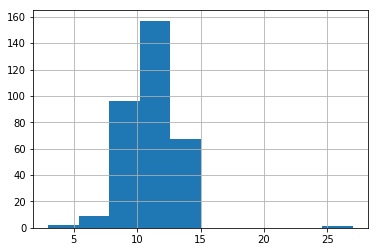

In [91]:
twitter_archive_master['rating_numerator'].hist()

This shows that numbers 10-13 have the highest numerators above 70, while the numbers 16-20 have 0 entries 

### Visualization

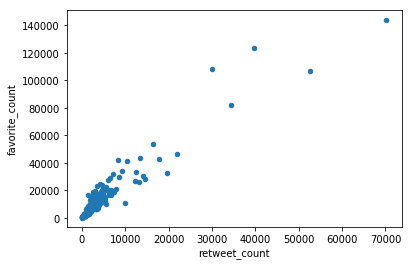

In [92]:
twitter_archive_master.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.show()

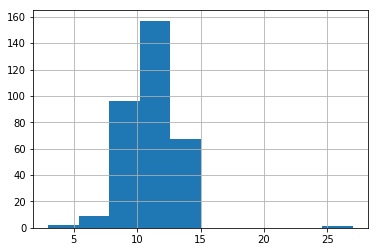

In [93]:
twitter_archive_master['rating_numerator'].hist()